<a href="https://colab.research.google.com/github/sol-commits/deep_learning/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST

In [1]:
import tensorflow as tf

In [8]:
import numpy as np

In [3]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0 # 각 픽셀이 255가 최댓값이어서 0-1사이의 값으로 조정

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
X_train.shape

(60000, 28, 28)

## one hot encoding

`loss` 함수를 `sparse_categorical_crossentropy`로 설정하면 같은 효과가 남

## 모델 생성

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │         785,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 795,010 (3.03 MB)

 Trainable params: 795,010 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

## 학습

In [14]:
import time

start_time = time.time()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100, verbose=1)

print('Fit time :', time.time() - start_time)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.8832 - loss: 0.3962 - val_accuracy: 0.9696 - val_loss: 0.1039
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9718 - loss: 0.0929 - val_accuracy: 0.9756 - val_loss: 0.0784
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9827 - loss: 0.0555 - val_accuracy: 0.9781 - val_loss: 0.0716
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9891 - loss: 0.0362 - val_accuracy: 0.9751 - val_loss: 0.0769
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.9926 - loss: 0.0261 - val_accuracy: 0.9816 - val_loss: 0.0583
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9952 - loss: 0.0176 - val_accuracy: 0.9785 - val_loss: 0.0688
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9962 - loss: 0.0141 - val_accuracy: 0.9811 - val_loss: 0.0666
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.9967 - loss: 0.0124 - 

## accuracy & loss

In [15]:
import matplotlib.pyplot as plt

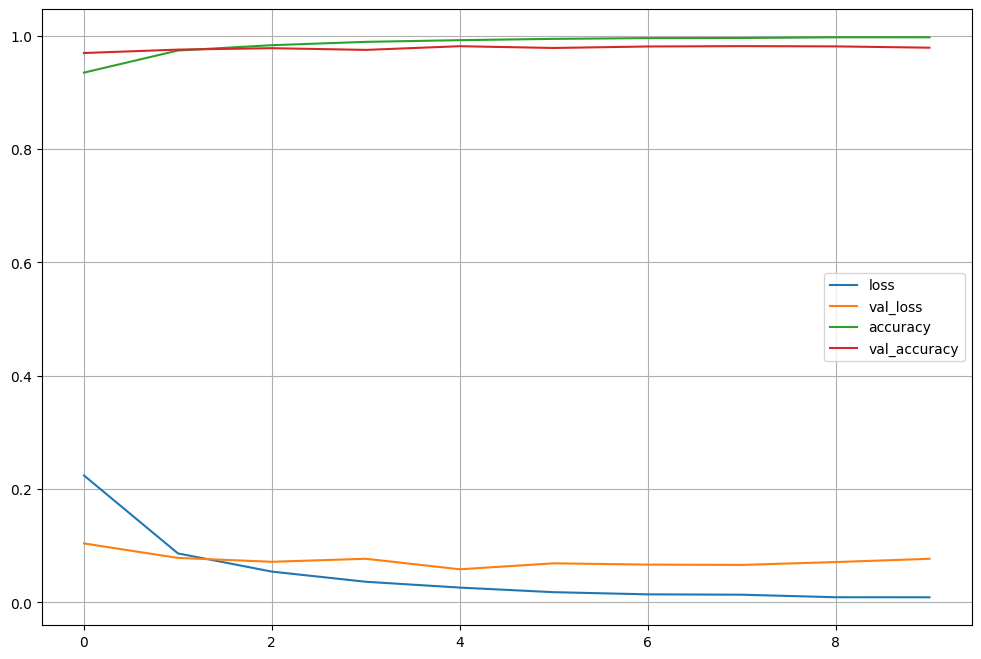

In [16]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))

for each in plot_target:
  plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [17]:
score = model.evaluate(X_test, y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9771 - loss: 0.0939
Test loss:  0.07681383937597275
Test accuracy:  0.9789999723434448


### 틀린 데이터 확인

In [18]:
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [19]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [20]:
# 틀린 데이터의 인덱스 모으기
wrong_result = []

for n in range(0, len(y_test)):
  if predicted_labels[n] != y_test[n]:
    wrong_result.append(n)

len(wrong_result)

210

In [21]:
# 그 중 16개만
import random

samples = random.choices(population=wrong_result, k=16)
samples

[3853,
 3533,
 8527,
 4140,
 7921,
 4880,
 4211,
 5046,
 2654,
 3475,
 2293,
 3130,
 720,
 7921,
 5734,
 445]

In [24]:
X_test[n].shape

(28, 28)

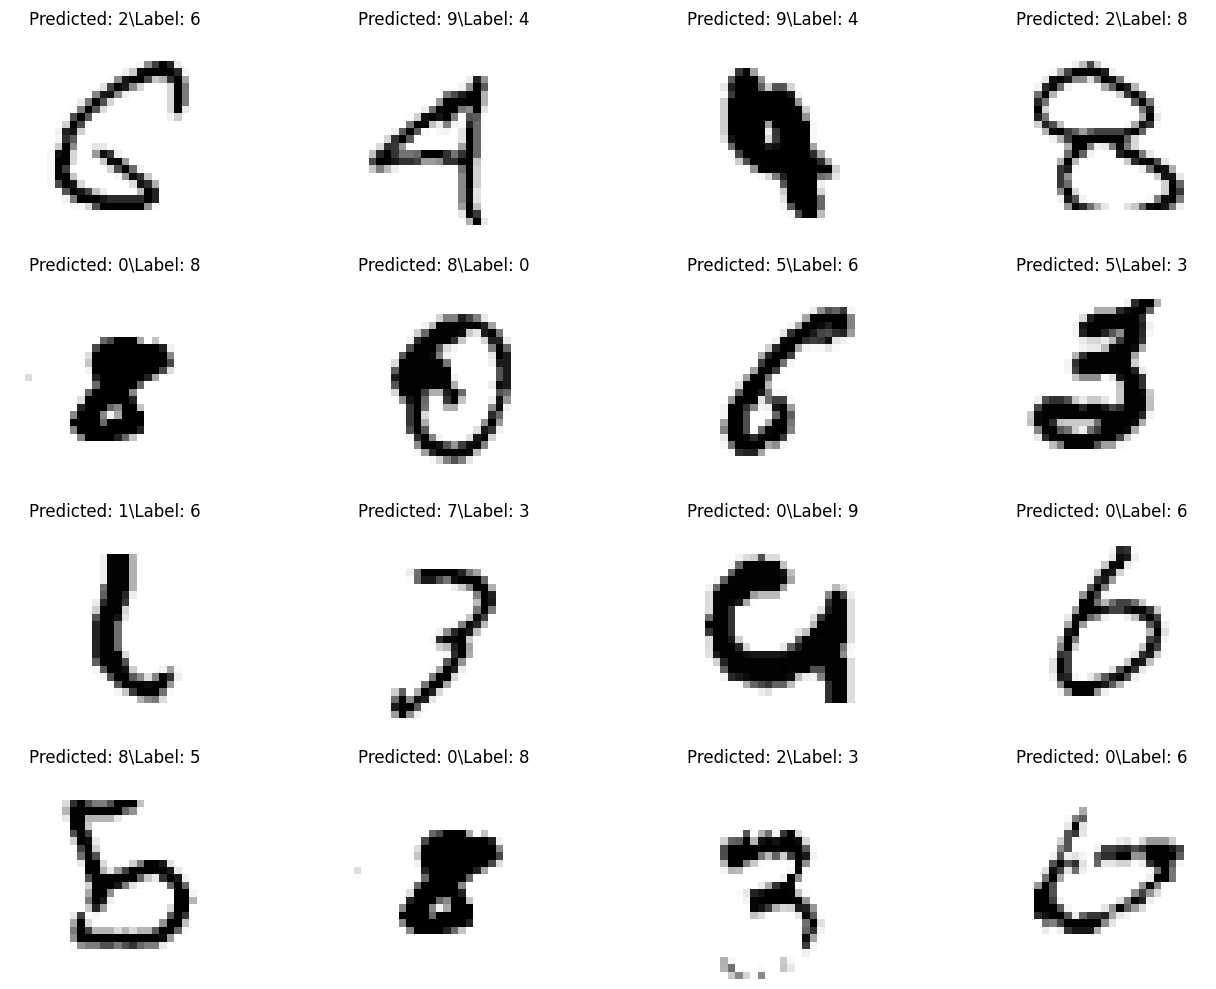

In [28]:
plt.figure(figsize=(14, 10))

for idx, n in enumerate(samples):
  plt.subplot(4, 4, idx+1)
  plt.imshow(
      X_test[n],
      cmap='Greys',
      interpolation='nearest'
  )
  plt.axis('off')
  plt.title(f'Predicted: {predicted_labels[n]}\Label: {y_test[n]}')

plt.tight_layout()
plt.show()

#MNIST fashion data

In [29]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0 # 각 픽셀이 255가 최댓값이어서 0-1사이의 값으로 조정

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [31]:
import random
import matplotlib.pyplot as plt

samples = random.choices(population=range(0, len(y_train)), k=16)

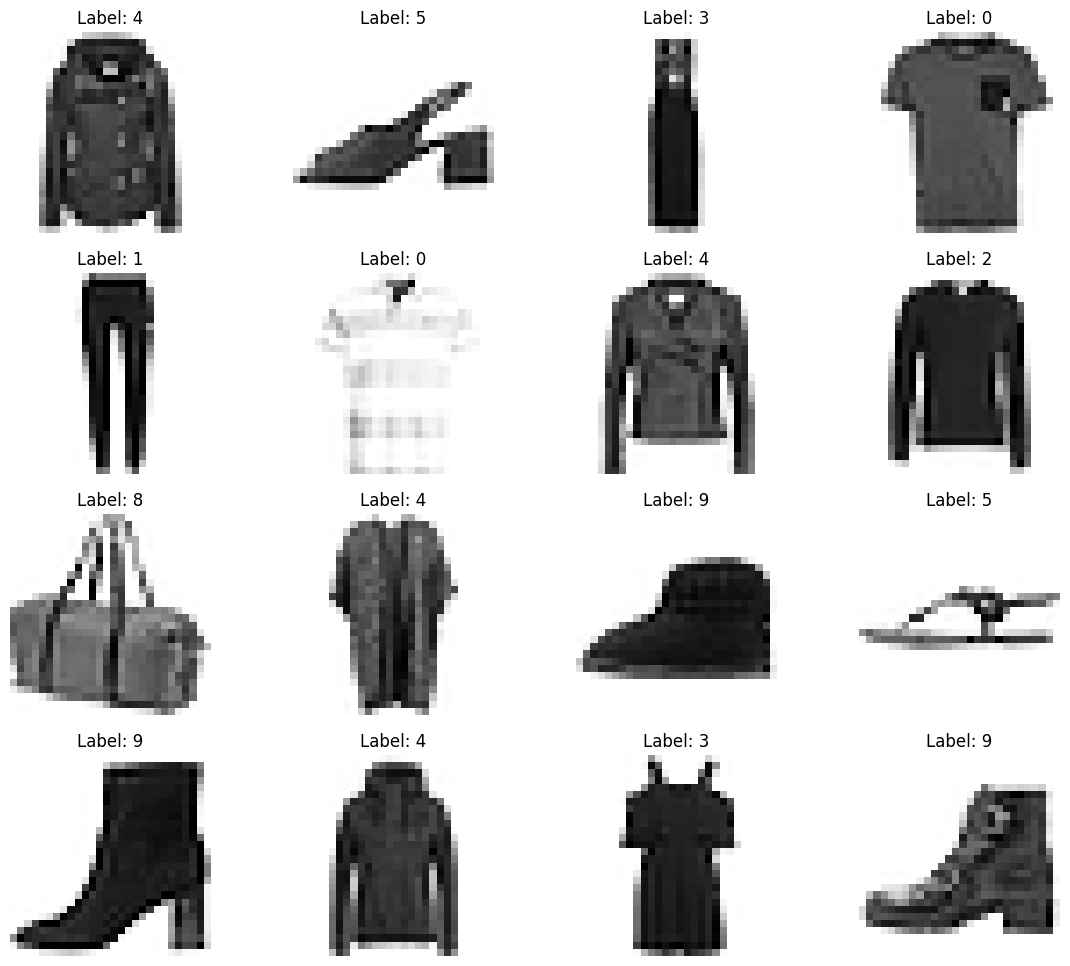

In [32]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
  plt.subplot(4, 4, idx+1)
  plt.imshow(
      X_train[n],
      cmap='Greys',
      interpolation='nearest'
  )
  plt.title('Label: ' + str(y_train[n]))
  plt.axis('off')

## 모델 생성

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1000)                │         785,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 795,010 (3.03 MB)

 Trainable params: 795,010 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

## 학습

In [35]:
start_time = time.time()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100, verbose=1)

print('Fit time :', time.time() - start_time)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7809 - loss: 0.6174 - val_accuracy: 0.8403 - val_loss: 0.4520
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8644 - loss: 0.3735 - val_accuracy: 0.8592 - val_loss: 0.3949
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.8799 - loss: 0.3282 - val_accuracy: 0.8751 - val_loss: 0.3485
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8889 - loss: 0.2998 - val_accuracy: 0.8708 - val_loss: 0.3496
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.8965 - loss: 0.2766 - val_accuracy: 0.8783 - val_loss: 0.3406
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9002 - loss: 0.2655 - val_accuracy: 0.8807 - val_loss: 0.3269
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9074 - loss: 0.2459 - val_accuracy: 0.8785 - val_loss: 0.3292
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9131 - loss: 0.2331 - 

## accuracy & loss

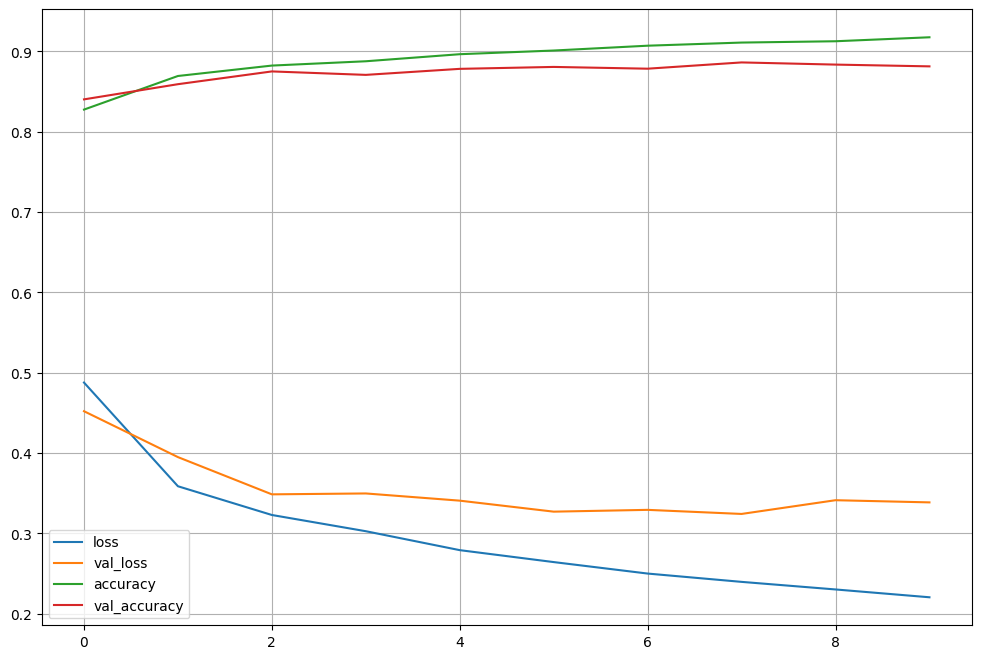

In [36]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))

for each in plot_target:
  plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [37]:
score = model.evaluate(X_test, y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8820 - loss: 0.3438
Test loss:  0.33846867084503174
Test accuracy:  0.8813999891281128


### 틀린 데이터 확인

In [38]:
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [39]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [40]:
# 틀린 데이터의 인덱스 모으기
wrong_result = []

for n in range(0, len(y_test)):
  if predicted_labels[n] != y_test[n]:
    wrong_result.append(n)

len(wrong_result)

1186

In [41]:
samples = random.choices(population=wrong_result, k=16)
samples

[8705,
 6596,
 7211,
 8676,
 6702,
 7596,
 9292,
 5520,
 1586,
 9662,
 5796,
 8710,
 6656,
 1162,
 3198,
 2312]

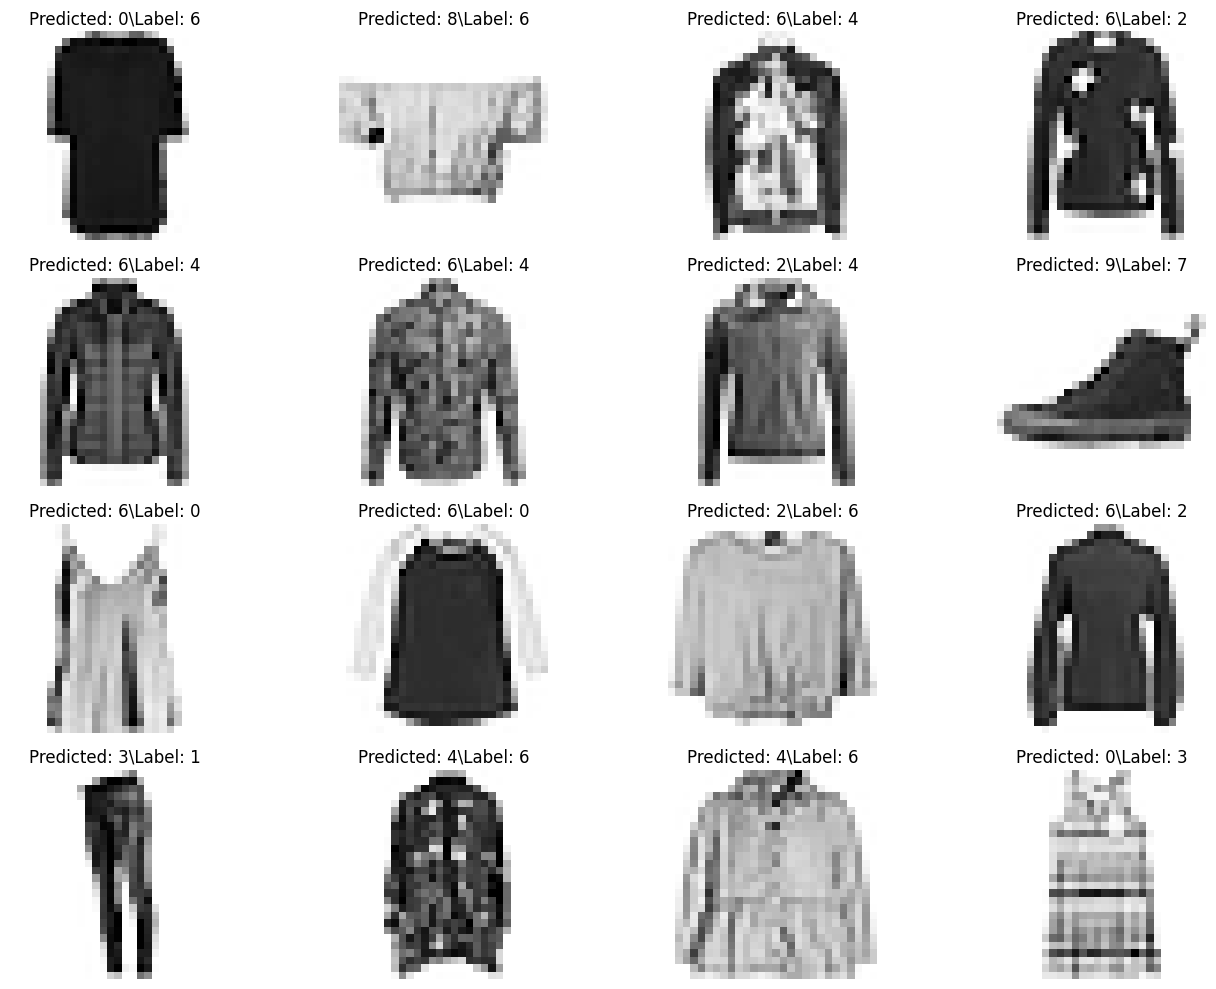

In [42]:
plt.figure(figsize=(14, 10))

for idx, n in enumerate(samples):
  plt.subplot(4, 4, idx+1)
  plt.imshow(
      X_test[n],
      cmap='Greys',
      interpolation='nearest'
  )
  plt.axis('off')
  plt.title(f'Predicted: {predicted_labels[n]}\Label: {y_test[n]}')

plt.tight_layout()
plt.show()